<a href="https://colab.research.google.com/github/Ryan-Passos/ciencia-de-dados-python/blob/main/Explorando_Dados_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importando a biblioteca Pandas:

import pandas as pd

notas = pd.read_csv("ratings.csv")

In [2]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
#Renoemando colunas:

notas.columns =["usuario", "filmeId", "nota", "tempo"]

In [4]:
#Quantidade de linhas e colunas:
notas.shape

(100836, 4)

In [5]:
#Refinando a visualização dos dados no Dataframe:

notas.nota

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [6]:
#Saber os valores únicos de derterminada coluna:

notas.nota.unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [7]:
#Saber a quantidade de vezes que determinado valor se repete:

notas.nota.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

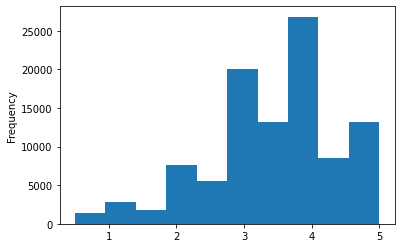

In [8]:
#Plotando os dados:

notas.nota.plot(kind='hist')

In [9]:
#Calcular a mediana das notas:
notas.nota.median()

3.5

In [10]:
#Calcular a média das notas:
notas.nota.mean()

3.501556983616962

In [11]:
#Podemos obter todas as medidas de uma vez só:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


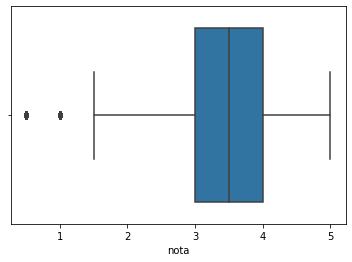

In [12]:
#Importando biblioteca Seaborn:

import seaborn as sns
sns.boxplot(notas.nota)

In [13]:
#Podemos realizar "query"(perguntas) para filtrar:

notas.query("filmeId==1")

,usuario,filmeId,nota,tempo
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [14]:
#Podemos refinar ainda mais: Notas que o filme com o Id=1 recebeu. Ainda calcular a média das notas
notas.query("filmeId==1").nota.mean()

3.9209302325581397

In [15]:
#Agrupando notas de acordo com o Id do Filme:

notas.groupby("filmeId").mean().nota

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [16]:
media_por_filme = notas.groupby("filmeId").mean().nota

Text(0.5, 1.0, 'Histograma')

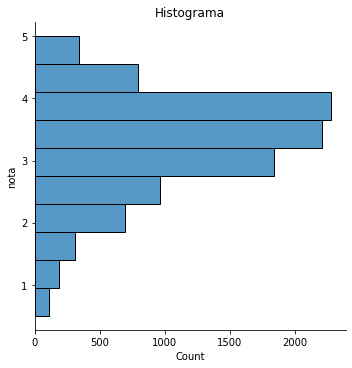

In [17]:
#Criando Histograma de barras com Seaborn

import matplotlib.pyplot as plt
sns.displot(y= media_por_filme, bins=10)
plt.title("Histograma")

(array([ 108.,  185.,  309.,  694.,  962., 1840., 2211., 2275.,  798.,
         342.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <a list of 10 Patch objects>)

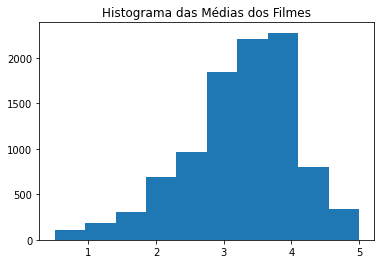

In [18]:
#Recriando o gráfico de forma "primitiva" com matplotlib:

import matplotlib.pyplot as plt
plt.title("Histograma das Médias dos Filmes")
plt.hist(media_por_filme)

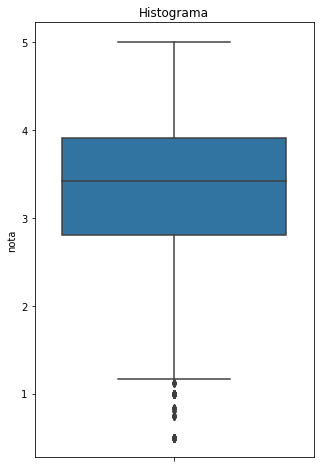

In [19]:
#Plotando o gráfico em forma de box:
#Configurando o tamanho da figura:
plt.figure(figsize=(5,8))
plt.title("Histograma")
sns.boxplot(y=media_por_filme)

In [20]:
#VISUALIZANDO GRÁFICOS POR CATEGORIA

In [21]:
pd.read_csv("tmdb_5000_movies.csv")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [22]:
#Armazenando esse arquivo dentro de uma variavel:

tmdb = pd.read_csv("tmdb_5000_movies.csv")

In [23]:
#Quantidade total de cada lingua: 

tmdb.original_language.value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [24]:
#Todos os idiomas:

tmdb.original_language.value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object')

In [25]:
#Transformando em Dataframe: 
tmdb.original_language.value_counts().to_frame()

,original_language
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12
ru,11


In [26]:
#Transformando em duas colunas, basta resetar o index:

tmdb.original_language.value_counts().to_frame().reset_index()

#Armazenando esse dado em uma variavel:

contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


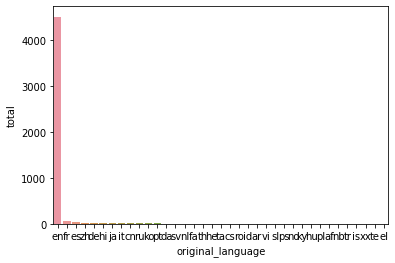

In [27]:
#Comparando Categorias através do Seaborn:

sns.barplot(x ="original_language", y="total", data = contagem_de_lingua)

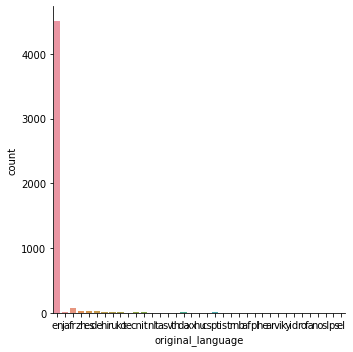

In [28]:
#Podemos ser mais práticos, plotando tudo de uma vez:
sns.catplot(x="original_language", kind="count", data=tmdb)

([<matplotlib.patches.Wedge at 0x7f20167d9e90>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

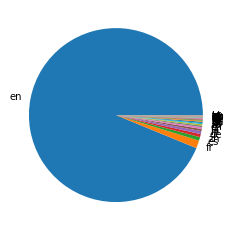

In [29]:
#A visualização ainda está confusa, mudar o tipo de gráfico:

plt.pie(contagem_de_lingua.total, labels = contagem_de_lingua.original_language)

In [30]:
#A visualização ainda está ruim. Então:
# 1° CONTAREMOS O TOTAL DE IDIOMAS
total_por_lingua = tmdb.original_language.value_counts()
#Contando a qtd total de idiomas:
total_geral = total_por_lingua.sum()
total_geral 

4803

In [31]:
# 2° Separa a qtd de filmes em ingles:

total_ingles = total_por_lingua.loc["en"]
total_ingles

4505

In [32]:
# 3° SEPARAR A QUANTIDADE DE FILMES QUE NÃO FALAM INGLÊS:

total_sem_ser_ingles = total_geral - total_ingles
total_sem_ser_ingles

298

In [33]:
# 4° CRIAR UM DATAFRAME A PARTIR DESSAS DUAS CATEGORIAS: INGLES E RESTO

dados ={
    'linguas':['ingles', 'outros'],
    'total':[total_ingles, total_sem_ser_ingles]
}

dados= pd.DataFrame(dados)
dados

,linguas,total
0,ingles,4505
1,outros,298


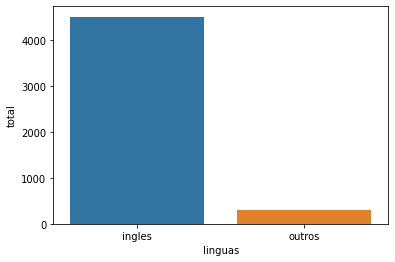

In [34]:
# 5° PLOTAR ESSAS INFORMAÇÕES, DE MODO QUE MOSTRE A RELAÇÃO DOS FILMES EM INGLÊS AOS DEMAIS:

sns.barplot(x="linguas", y="total", data=dados)

In [35]:
linguas_que_mais_aparecem = tmdb.query("original_language != 'en'").original_language.value_counts() 
linguas_que_mais_aparecem

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: original_language, dtype: int64

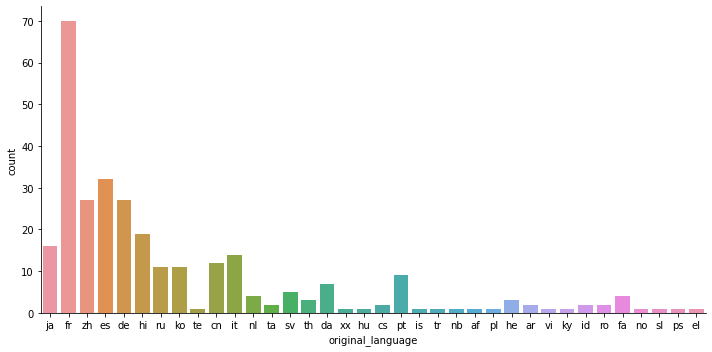

In [36]:
# 6° Podemos ainda explorar os outros dados:

#Filtrar o total de linguas sem ser ingles:
outras_linguas = tmdb.query("original_language != 'en'")

#Plotaresmos, usando o catplot.
sns.catplot(data=outras_linguas, x="original_language", kind="count", aspect=2)

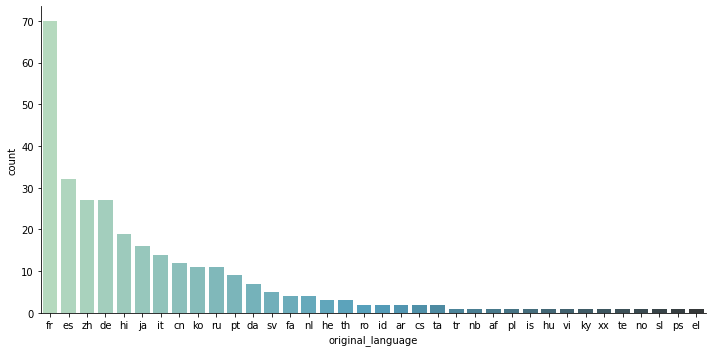

In [37]:
# 7° Ordemaremos pelo indice do maior para o menor e mudaremos a paleta de cores:

sns.catplot(data=outras_linguas, x="original_language", kind="count", aspect=2, order=linguas_que_mais_aparecem.index, palette="GnBu_d")

In [38]:
# QUEREMOS CALCULAR A MÉDIA DOS DOIS PRIMEIROS FILMES DA LISTA

# 1° Filtrar o filme id, depois guardalos em uma variavel
notas_toy_story = notas.query("filmeId==1").nota
notas_jumanji = notas.query("filmeId==2").nota

In [39]:
# 2° Imprimir a média e a mediana:

print("A mediana do Toy Story foi %.2f"% notas_toy_story.mean())
print("A media do Toy Story foi %.2f"% notas_toy_story.median())
print("A mediana do Jumanji foi %.2f"% notas_jumanji.mean())
print("A media do Jumanji foi %.2f"% notas_jumanji.median())

A mediana do Toy Story foi 3.92
A media do Toy Story foi 4.00
A mediana do Jumanji foi 3.43
A media do Jumanji foi 3.50


IMPORTANDO BIBLIOTECA NUMPY

In [40]:
import numpy as np
np.array([2.5]*10)

array([2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5])

In [41]:
#Ainda é possível calcular a média diretamente

np.array([2.5]*10).mean()

2.5

In [42]:
np.array([3.5]*10).mean()

3.5

In [43]:
#Juntando dois ou mais arrays

filme1 = np.append(np.array([3.5]*10), np.array([2.5]*10))
filme1

array([3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 2.5, 2.5, 2.5,
       2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5])

In [44]:
filme2 = np.append(np.array([5]*10), np.array([1]*10))
filme2

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [45]:
#Calculando a media no numpy
print(filme1.mean(), filme2.mean())

#Calculando a mediana no numpy
print(np.median(filme1), np.median(filme2))

3.0 3.0
3.0 3.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


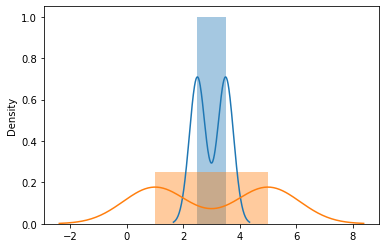

In [46]:
#Plotando os dados para uma melhor visualização

sns.distplot(filme1)
sns.distplot(filme2)

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

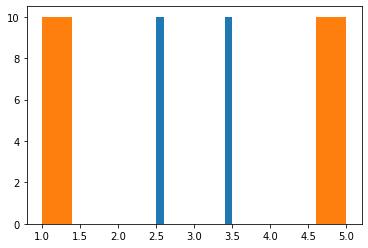

In [47]:
#Melhorando a visualização com gráficos em barras

plt.hist(filme1)
plt.hist(filme2)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f201628c610>,
 'caps': [<matplotlib.lines.Line2D at 0x7f20162920d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f201628c090>,
 'medians': [<matplotlib.lines.Line2D at 0x7f2016292b90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f201629c110>,
 'means': []}

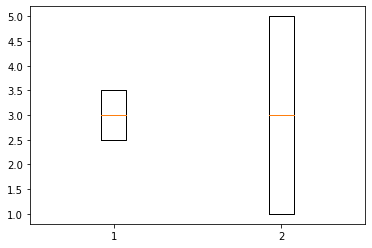

In [48]:
#Visualizar a distribuição das notas de uma forma melhor

plt.boxplot([filme1, filme2])

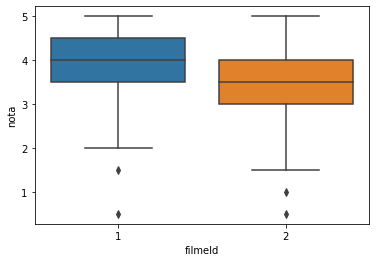

In [49]:
#Esse mesmo estilo de plotação atraváes do Seaborn, fica mais agradável, pois nos dá figuras colorida

sns.boxplot(x="filmeId", y= "nota", data=notas.query("filmeId in (1,2)"))

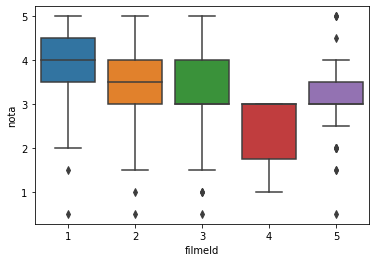

In [50]:
#Podemos comparar quantos filmes quisermos, basta, filtrar na pergunta, os IDs desejados

sns.boxplot(x="filmeId", y= "nota", data=notas.query("filmeId in (1,2,3,4,5)"))

In [51]:
 #Calculando o Desvio Padrão: Informa o quanto os dados fogem de uma tendência central

print("Desvio padrão do Toy Story %.2f" % notas_toy_story.std())
print("Desvio padrão do Jumanji %.2f" % notas_jumanji.std())

Desvio padrão do Toy Story 0.83
Desvio padrão do Jumanji 0.88
